In [168]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

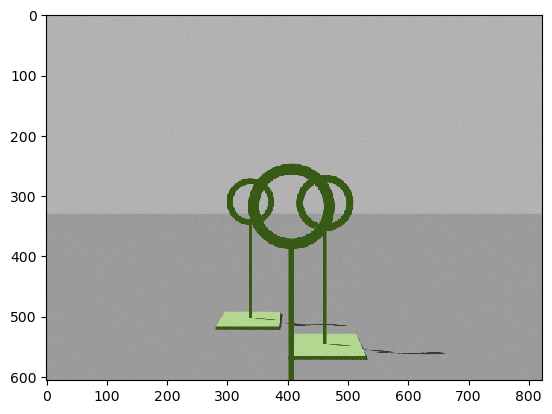

In [169]:
img = cv2.imread('images/image7.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

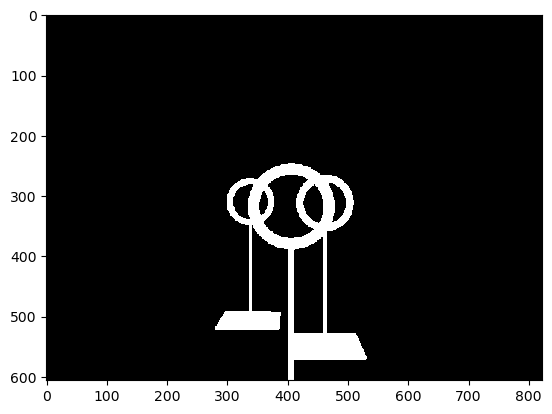

In [170]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gates = cv2.inRange(img_hsv, (0, 20, 20), (179, 255, 255))
plt.imshow(gates, cmap='gray')
plt.show()

In [171]:
def largest_contour_with_child(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    cont_arr = []
    for i, cont in enumerate(contours):
        # Has children?
        if hierarchy[0][i][2] > -1:
            cont_arr.append(cont)
    
    if len(cont_arr) == 0:
        return []

    sizes = []
    for cont in cont_arr:
        sizes.append(cv2.contourArea(cont))

    largest = cont_arr[np.argmax(sizes)]
    return largest

def test_defects(cont):
    hull = cv2.convexHull(cont,returnPoints = False)
    defects = cv2.convexityDefects(cont,hull)

    if  defects is None:
        print('defects none')
        return True
    
    furthest =  defects[:, :, 3]/256.0
    furthest = furthest.flatten()

    for dist in furthest:
        print(dist)
        if dist > 10:
            return False

    return True

def sep_closest_gate(img):
    kernel = np.ones((4,4),np.uint8)

    for i in range(50):
        cont = largest_contour_with_child(img)
        
        if len(cont) == 0:
            img = cv2.dilate(img, kernel, iterations = 1)
            break
        
        if test_defects(cont):
            break
        img = cv2.erode(img, kernel, iterations = 1)

    return img

def sep_closest_gate2(img):
    kernel = np.ones((2,2),np.uint8)
    test_img = img.copy()
    index = 0
    for i in range(50):
        test_img = cv2.erode(test_img, kernel, iterations = 1)
        cont = largest_contour_with_child(test_img)

        if len(cont) == 0:
            index = i
            print('cont 0')
            break
        elif test_defects(cont):
            index = i + 1
            print('def')
            break
    for i in range(index):
        img = cv2.erode(img, kernel, iterations = 1)
    return img




def preprocess(filename):
    f = os.path.join('images', filename)
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    gates = cv2.inRange(img_hsv, (0, 20, 20), (179, 255, 255))

    return gates

72.3125
72.3125
72.3125
72.3125
72.3125
cont 0


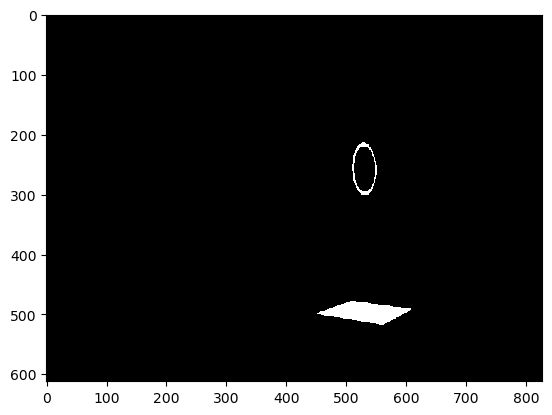

62.69921875
62.69921875
62.69921875
62.69921875
62.69921875
61.93359375
115.76953125
115.03125
111.2734375
10.55078125
5.0
9.12890625
5.62890625
0.6328125
0.86328125
0.7265625
0.84765625
0.8203125
0.78515625
1.0546875
0.89453125
3.328125
2.89453125
1.0859375
0.8203125
1.6796875
3.14453125
0.67578125
0.9296875
0.4453125
0.83984375
0.89453125
0.8203125
0.84765625
0.98046875
0.7421875
1.21875
3.3515625
6.34375
def


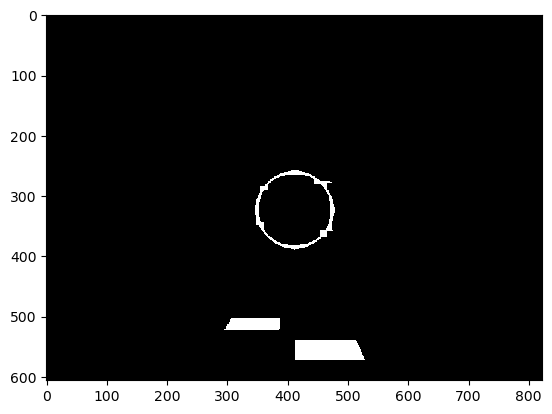

28.23828125
28.23828125
5.0
6.62890625
0.6328125
0.6328125
0.4453125
0.5546875
1.9921875
2.0
8.515625
21.8203125
1.0
2.12109375
0.6015625
0.4453125
0.6328125
0.6328125
0.4453125
0.5546875
0.8671875
0.96875
0.84765625
2.27734375
1.31640625
0.6328125
0.7421875
0.5546875
2.12109375
def


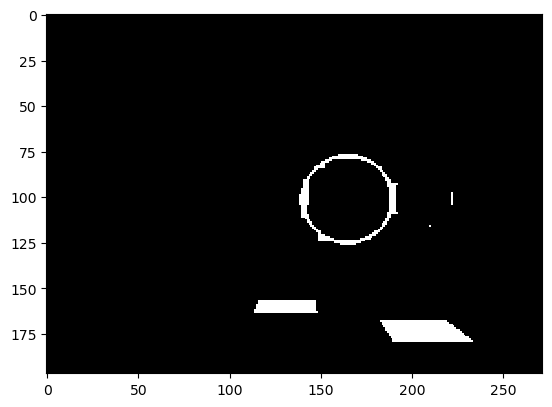

76.78515625
76.78515625
76.78515625
76.78515625
76.78515625
76.78515625
75.8046875
75.8046875
defects none
def


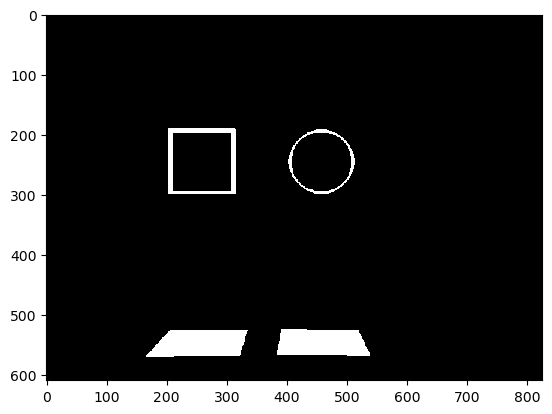

61.23046875
61.23046875
61.23046875
61.23046875
61.23046875
61.23046875
19.17578125
19.17578125
19.17578125
19.17578125
19.17578125
1.69921875
10.1015625
cont 0


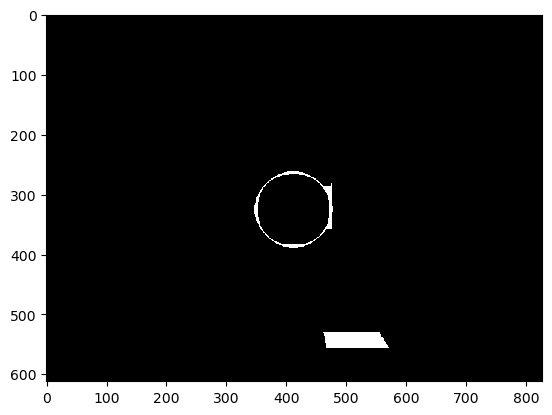

54.80078125
54.80078125
54.80078125
54.80078125
54.80078125
95.6953125
95.6953125
94.96875
94.96875
11.12109375
0.89453125
0.6328125
1.0390625
0.80078125
0.70703125
1.109375
0.77734375
0.4453125
0.86328125
0.7265625
0.8203125
0.8203125
0.7265625
0.86328125
0.4453125
0.796875
0.625
0.80078125
1.2421875
0.6328125
0.8671875
0.78515625
0.98046875
0.4453125
0.5546875
1.0
0.734375
5.8671875
7.5234375
1.109375
0.89453125
0.7421875
0.89453125
def


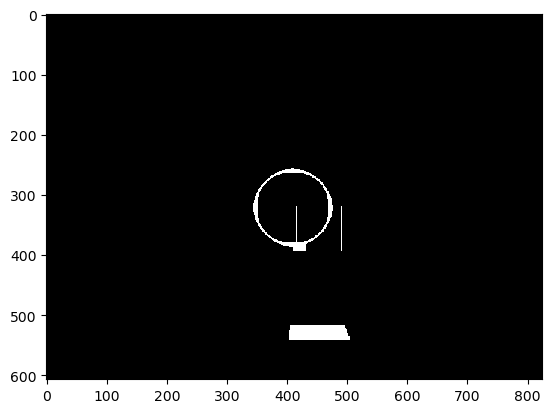

61.890625
61.890625
61.890625
61.890625
61.890625
61.890625
42.078125
42.078125
42.078125
42.078125
42.078125
7.734375
0.9921875
def


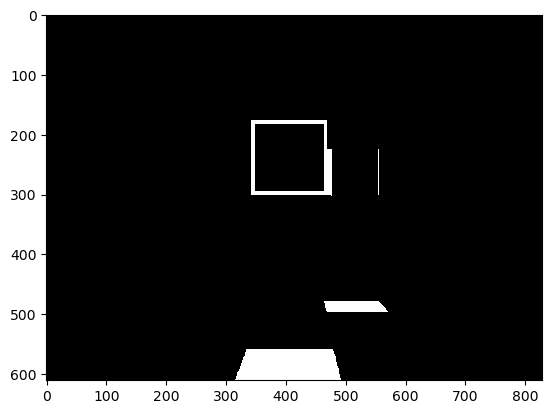

48.19140625
48.19140625
48.19140625
48.19140625
0.4453125
1.109375
1.0
0.5546875
20.640625
69.578125
3.53515625
0.6015625
18.45703125
3.53515625
0.6015625
18.45703125
18.3125
9.47265625
1.19921875
0.5546875
0.77734375
0.4453125
0.86328125
0.7265625
0.7265625
0.86328125
0.4453125
0.97265625
1.1640625
0.70703125
0.96484375
1.33984375
0.6328125
3.55859375
4.83203125
7.4609375
1.15234375
0.78515625
1.15234375
3.578125
9.90625
def


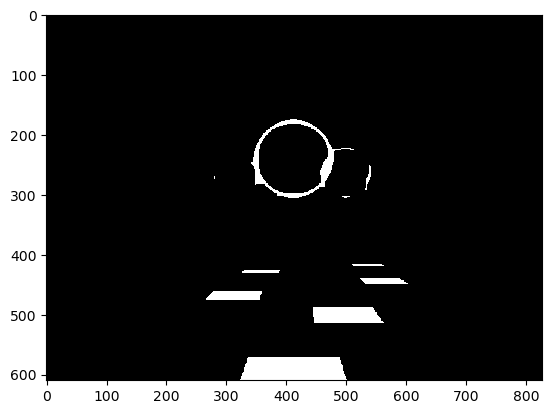

99.1640625
99.1640625
99.1640625
99.1640625
99.1640625
99.1640625
99.1640625
0.9140625
1.5390625
def


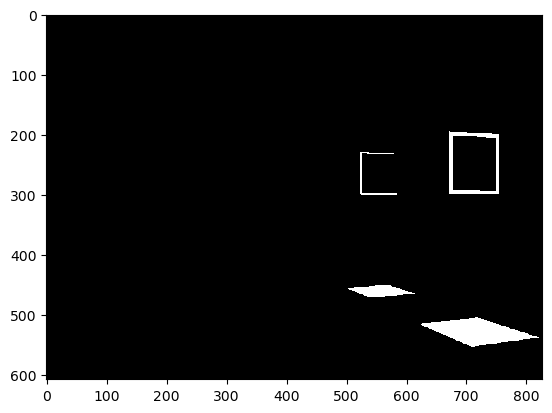

87.421875
87.421875
87.421875
87.421875
86.7109375
86.7109375
86.7109375
86.04296875
0.98046875
0.98046875
def


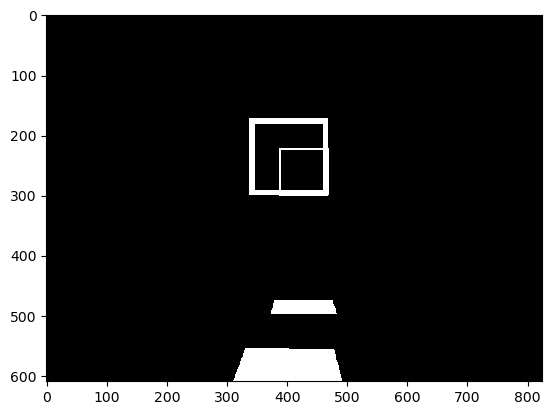

65.0703125
65.0703125
65.0703125
65.0703125
65.0234375
65.0234375
0.96875
0.4453125
0.6875
0.5546875
0.70703125
15.55859375
0.96875
0.4453125
0.6875
0.5546875
0.70703125
15.55859375
15.31640625
14.0625
5.37890625
0.70703125
1.09375
1.15234375
1.265625
0.7265625
0.78515625
0.8203125
0.7265625
1.0234375
0.4453125
0.9921875
1.0
0.66015625
0.6015625
1.2421875
0.6328125
0.96875
0.8203125
0.98046875
0.89453125
3.47265625
3.34375
0.8828125
1.07421875
0.6328125
3.97265625
3.71875
0.6328125
4.671875
def


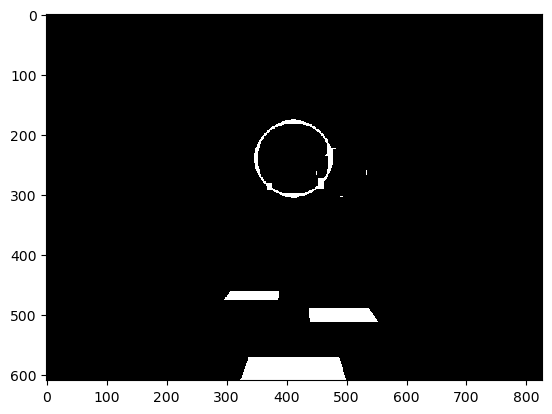

19.10546875
0.6328125
0.4453125
6.32421875
0.5546875
0.6875
0.7265625
0.6328125
0.4453125
0.5546875
0.4453125
0.6328125
0.7265625
36.57421875
0.7421875
0.5546875
0.5546875
0.6875
0.7265625
0.6328125
0.4453125
0.5546875
0.4453125
0.6328125
0.7265625
0.7265625
0.6328125
0.4453125
0.6015625
0.625
0.4453125
0.6328125
0.78515625
0.78515625
0.6328125
1.18359375
1.109375
0.6328125
def


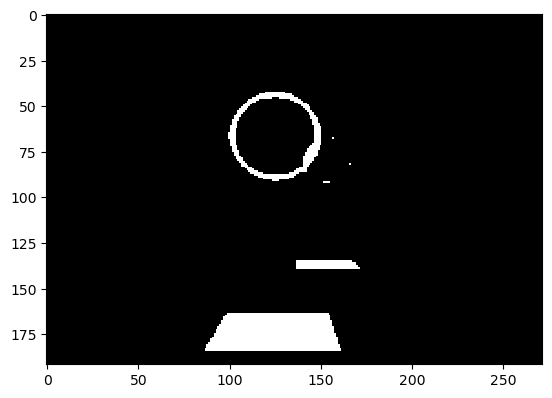

28.89453125
27.95703125
0.6328125
0.4453125
0.4453125
0.6328125
0.7265625
0.78515625
0.4453125
0.5546875
0.5546875
0.6328125
0.7265625
0.6328125
0.6875
0.4453125
0.7265625
0.6328125
0.4453125
0.6015625
0.6015625
0.5546875
0.7421875
def


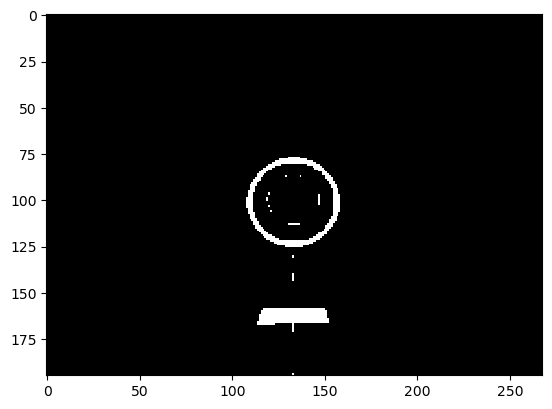

34.0078125
34.0078125
0.6328125
0.5546875
0.6015625
0.6015625
0.4453125
0.6328125
0.7265625
0.4453125
0.5546875
0.4453125
0.6328125
0.6328125
0.4453125
0.5546875
0.6015625
0.4453125
1.484375
1.484375
0.4453125
0.5546875
0.5546875
0.6328125
def


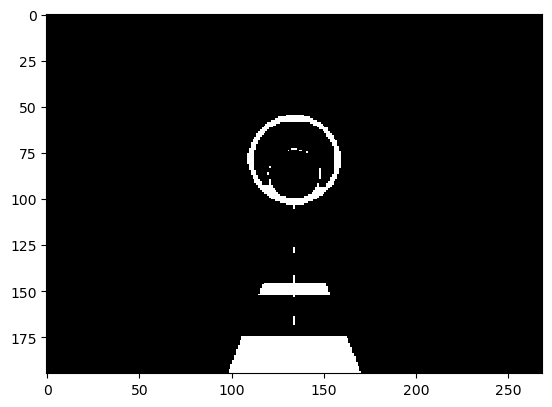

81.26953125
81.26953125
81.26953125
81.26953125
81.26953125
0.6328125
0.8203125
1.51953125
def


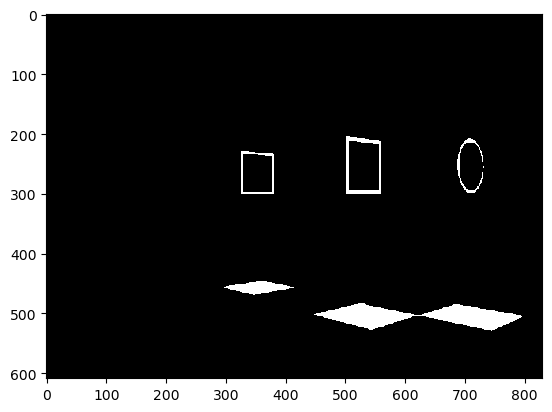

In [172]:
for filename in os.listdir('images'):
    gates = preprocess(filename)
    closest_gate = sep_closest_gate2(gates)
    plt.imshow(closest_gate, cmap='gray')
    plt.show()

In [173]:
closest_gate = sep_closest_gate(gates)

81.26953125
81.26953125
0.6328125
0.8203125
1.51953125


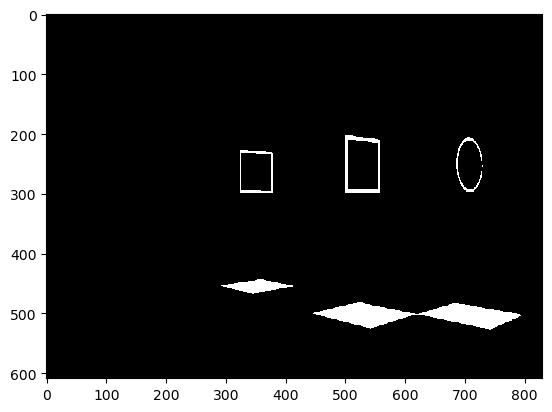

In [174]:
plt.imshow(closest_gate, cmap='gray')
plt.show()